# **HAVOK study** | scalability

Generate the test dataset used to characterize the Havok output prediction capabilities.

In [1]:
from rhavok.havok import havok

import numpy as np
import matplotlib.pyplot as plt

#### Data import

We import the Lorenz attractor data. This ODE solution has been generated using the parameters
$\sigma = 10$, $\beta = 8/3$ and $\rho = 28$, with initial condition $x_0 = \left[ -8, 8, 27\right]$. The data is sampled with time step $dt=0.001$ using an ode45 solver.

In [2]:
# load data from Lorenz attractor
xxn, yyn, zzn = np.loadtxt('./data/data_attractors/Lorenz_precision_timeseries.csv',
                           unpack=True)
dt = 0.001
ttn = dt*np.arange(len(xxn))

### Havok workflow

In [3]:
lorh = havok(dataset = xxn, dt = dt, timing = ttn, time_delay_size = 100, crop = int(1200/dt),
                 train_size = int(200/dt), rank = 20)

applying crop index 1200000


In [4]:
lorh.build_Hankel();

Built Hankel matrix with shape (100, 199901)


In [5]:
lorh.svd();

In [6]:
# set the sindy routines to default
lorh.set_sindy()

In [7]:
regr = lorh.regression()  # catch returns or use semicolons to suppress stdout

sparse regression Xi of shape (21, 19)


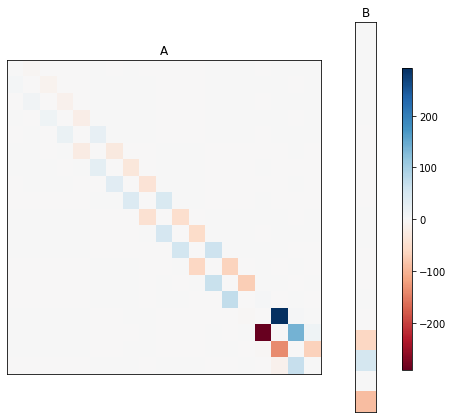

In [8]:
lorh.show_regression()  # just to check it out

### Retrieve the test dataset

In [9]:
v_test, t_test = lorh.compute_test_dataset()
v_test.shape

(1000000, 20)

In [10]:
x_test = lorh.get_test_dataset()
x_test.shape

(1000000,)

### Save the test dataset

In [11]:
save_path = './data/data_havok/'
np.savetxt(save_path + 'test_v.csv', v_test)
np.savetxt(save_path + 'test_t.csv', t_test)
np.savetxt(save_path + 'test_x.csv', x_test)

***

Code by *Francesco Barone*, last review: 31 may 2022. <br>**Workgroup**: Barone Francesco, Nagaro Gianmarco, Ninni Daniele, Valentini Lorenzo.

University of Padua, **Laboratory of Computational Physics**, module B.